In [10]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Read datset
df = pd.read_csv("UserDetail.csv")

In [12]:
# Visualize the data for Weibo users' information 
df.head(5)

,id,昵称,性别,所在地,关注数,粉丝数,微博数,创建时间,等级,会员等级,个人简介,教育经历,公司,阳光信用,类别,Unnamed: 15
0,6529218955,布丁茶lcsxyk,女,海外,227,145,8821,NaN,14,0,NaN,NaN,NaN,NaN,0,NaN
1,6941098054,等待坤哥2tz847,男,其他,0,1,32,2019/1/15,3,0,NaN,NaN,NaN,信用较低,2,NaN
2,7016592498,蔡叶子CTZ899,男,其他,0,1,10,NaN,4,0,NaN,NaN,NaN,NaN,2,NaN
3,6974679221,坤爱音乐6IL769,男,其他,0,1,24,2019/1/28,4,0,NaN,NaN,NaN,信用较低,2,NaN
4,7018083758,吧唧坤呀v3G157,男,其他,0,1,10,NaN,3,0,NaN,NaN,NaN,NaN,2,NaN


In [13]:
# Translate columns' names to english
df.columns = ['id', 'name', 'gender', 'location', 'follows', 'fans', 'weibos', 'birth', 'level', 'member_level', 'introduction', 'education', 'company', 'trust', 'class', 'Unnamed: 15']

Considering the privacy and rules of using user information in Weibo, I will delete parts of my data. For this project, I will only upload the template for crawling and revised version of datasets.

In [14]:
df.drop(['name'],axis=1)

,id,gender,location,follows,fans,weibos,birth,level,member_level,introduction,education,company,trust,class,Unnamed: 15
0,6529218955,女,海外,227,145,8821,NaN,14,0,NaN,NaN,NaN,NaN,0,NaN
1,6941098054,男,其他,0,1,32,2019/1/15,3,0,NaN,NaN,NaN,信用较低,2,NaN
2,7016592498,男,其他,0,1,10,NaN,4,0,NaN,NaN,NaN,NaN,2,NaN
3,6974679221,男,其他,0,1,24,2019/1/28,4,0,NaN,NaN,NaN,信用较低,2,NaN
4,7018083758,男,其他,0,1,10,NaN,3,0,NaN,NaN,NaN,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,6941600823,男,其他,0,1,12,NaN,0,0,NaN,NaN,NaN,NaN,2,NaN
2229,6589486612,男,福建,1,1,574,2018/7/2,4,0,NaN,NaN,NaN,信用较低,2,NaN
2230,6552321214,女,山西,100,160,2622,NaN,21,0,有关必回,NaN,NaN,NaN,0,NaN
2231,7012433865,男,其他,0,1,39,NaN,4,0,NaN,NaN,NaN,NaN,2,NaN


In [15]:
df.to_csv("Revised_UserDetail.csv")

Now, let us do some data visualization over these features to see if there are only suspicious users:

In [24]:
# You should start directly run this, if you are using revised version
# df = pd.read_csv("Revised_UserDetail.csv")

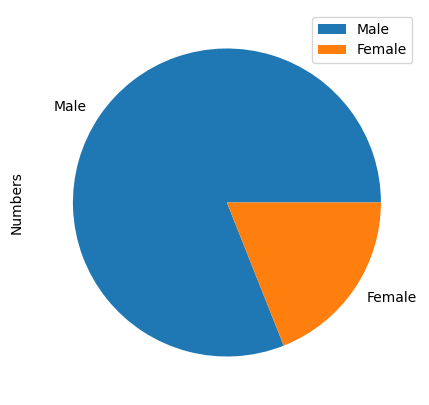

In [16]:
# Gender

# Do some translations
df.replace('男', 'Male', inplace=True)
df.replace('女', 'Female', inplace=True)

# Display by pie plot
df_sex = pd.DataFrame({'Numbers':[1809, 424]}, index=['Male', 'Female'])
sex_pie_plot = df_sex.plot.pie(y='Numbers', figsize=(5, 5))

C:\Users\lsion\AppData\Local\Temp\ipykernel_17240\2220400583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'][index] = str(df['location'][index]).split(" ")[0]


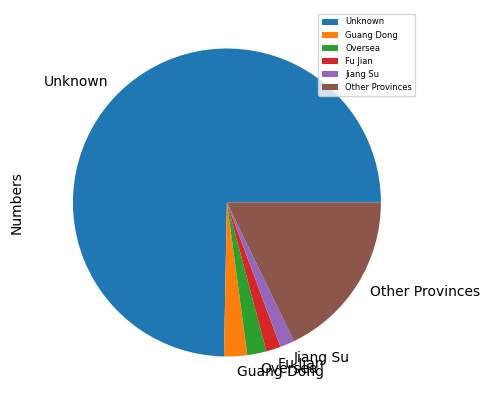

In [21]:
# Location
# Since there are too many different locations, and their formats are "province + city", so I just delete city
# To further reduce dense elements, I only show the top 5 locations, and regard all others as "other"
index = 0
df.astype(str)
while index < len(df['location']):
    df['location'][index] = str(df['location'][index]).split(" ")[0]
    index = index + 1

df_location = pd.DataFrame({'Numbers':[1668, 54, 45, 34, 34, 398]}, index=['Unknown', 'Guang Dong', 'Oversea', 'Fu Jian', 'Jiang Su', 'Other Provinces'])
location_pie_plot = df_location.plot.pie(y='Numbers', figsize=(5, 5))
location_pie_plot.legend(fontsize=6)

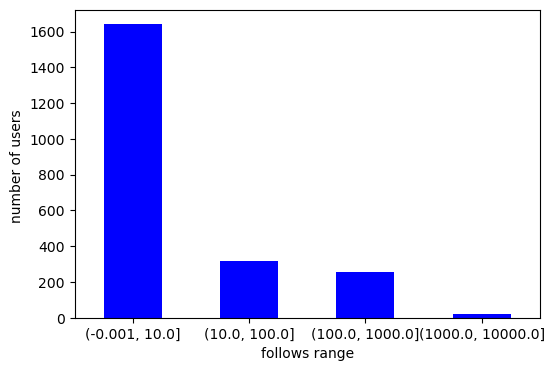

In [22]:
# Follows

out = pd.cut(df['follows'], bins=[0, 10, 100, 1000, 10000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.xlabel('follows range')
plt.ylabel('number of users ')
plt.show()

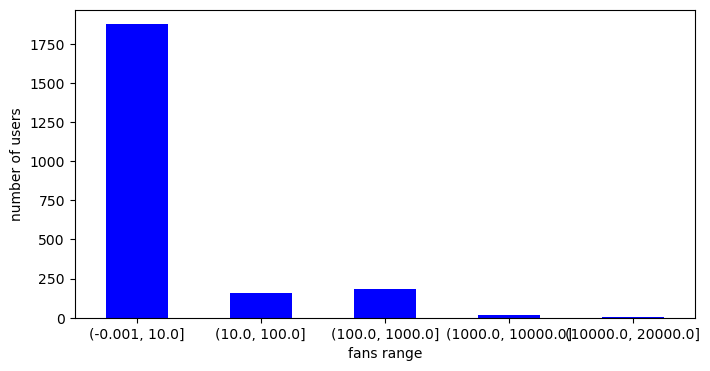

In [23]:
# Fans

out = pd.cut(df['fans'], bins=[0, 10, 100, 1000, 10000, 20000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(8,4))
plt.xlabel('fans range')
plt.ylabel('number of users')
plt.show()

In [33]:
# Creation time of account
# The time format is year + month + day, here I only use year
index = 0
while index < len(df['birth']):
    if '/' in str(df['birth'][index]):
        df['birth'][index] = int(str(df['birth'][index]).split("/")[0])
    index = index + 1

C:\Users\lsion\AppData\Local\Temp\ipykernel_17240\3938887169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth'][index] = int(str(df['birth'][index]).split("/")[0])


In [37]:
df['birth'].value_counts()

2019    520
2018    140
2017     21
2016     16
2014      9
2013      9
2015      7
2012      6
2010      6
2011      3
Name: birth, dtype: int64

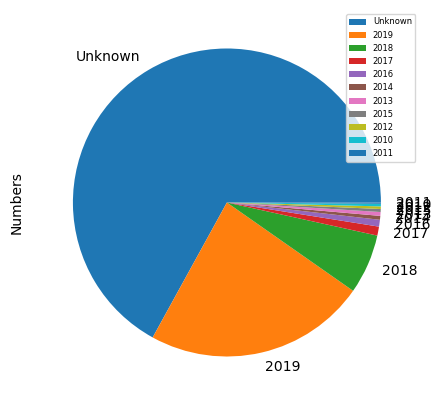

In [40]:
df_birth = pd.DataFrame({'Numbers':[1496, 520, 140, 21, 16, 9, 9, 7, 6, 6, 3]}, index=['Unknown', '2019', '2018', '2017', '2016', '2014', '2013', '2015', '2012', '2010', '2011'])
location_birth_plot = df_birth.plot.pie(y='Numbers', figsize=(5, 5))
location_birth_plot.legend(fontsize=6)

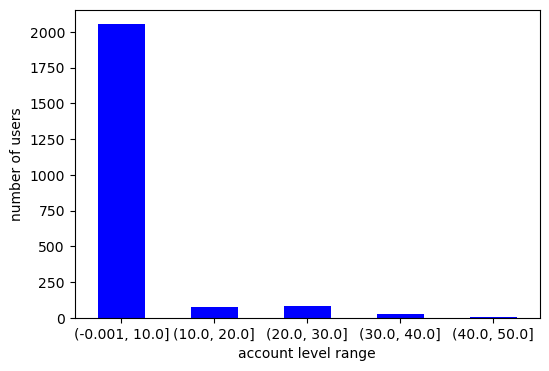

In [25]:
# Levels

out = pd.cut(df['level'], bins=[0, 10, 20, 30, 40, 50], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.xlabel('account level range')
plt.ylabel('number of users')
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

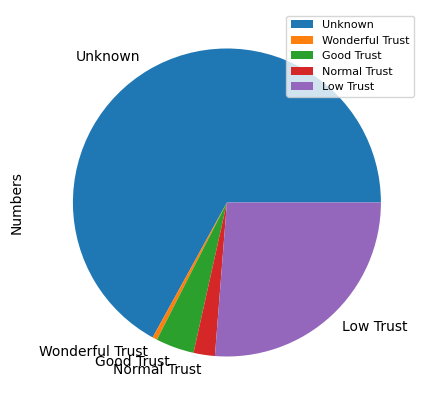

In [26]:
# Trust

df.replace('信用较低', 0, inplace=True)
df.replace('信用一般', 1, inplace=True)
df.replace('信用极好', 2, inplace=True)

df_trust = pd.DataFrame({'Numbers':[1496, 11, 90, 50, 586]}, index=['Unknown','Wonderful Trust', 'Good Trust', 'Normal Trust', 'Low Trust'])
trust_pie_plot = df_trust.plot.pie(y='Numbers', figsize=(5, 5))
trust_pie_plot.legend(fontsize=8)